In [34]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

In [35]:
def loadData(path):
    listOfTestFiles = os.listdir(path=path)
    train = []
    train_labels = []
    test = []
    test_labels = []
        
        
    print("Training files = ",listOfTestFiles[0:6])
    #For collecting Training data:
    for file in listOfTestFiles[0:6]:
        print(path+file)
        with open(path+file,'rb') as fo:
            dict = pickle.load(fo, encoding='latin1')
            train.append(dict['data'])
            train_labels.append(dict['labels'])

    print(listOfTestFiles[4])
    #for collecting Testing data
    with open(path+listOfTestFiles[4],'rb') as fo:
            dict = pickle.load(fo,encoding='latin1')
            test.append(dict['data'])
            test_labels.append(dict['labels'])

    dictData = {}
    dictData['train_data'] = np.reshape(np.array(train),newshape=(np.array(train).shape[0]*np.array(train).shape[1],np.array(train).shape[2]))
    dictData['train_labels'] = np.reshape(np.array(train_labels),newshape=(np.array(train_labels).shape[0]*np.array(train_labels).shape[1]))
    dictData['test_data'] = np.reshape(np.array(test),newshape=(np.array(test).shape[0]*np.array(test).shape[1],np.array(test).shape[2]))
    dictData['test_labels'] = np.reshape(np.array(test_labels),newshape=(np.array(test_labels).shape[0]*np.array(test_labels).shape[1]))
    return dictData

In [36]:
dataset = loadData(path='../cifar-10-batches-py/')

Training files =  ['data_batch_1', 'data_batch_2', 'data_batch_5', 'data_batch_4', 'data_batch_3']
../cifar-10-batches-py/data_batch_1
../cifar-10-batches-py/data_batch_2
../cifar-10-batches-py/data_batch_5
../cifar-10-batches-py/data_batch_4
../cifar-10-batches-py/data_batch_3
data_batch_3


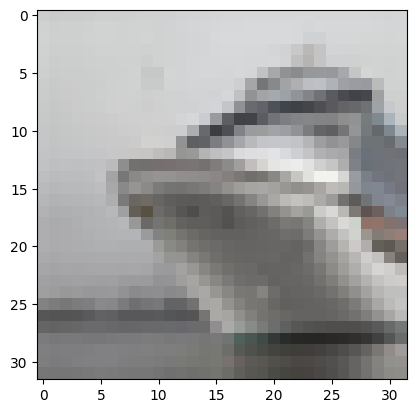

In [37]:
temp = dataset['test_data'][128]

R = temp[0:1024].reshape(32,32)
G = np.reshape(temp[1024:2048],newshape=(32,32))
B = np.reshape(temp[2048:],newshape=(32,32))
temp = np.dstack((R,G,B))   #for stacking all these 32,32 matrices.
plt.imshow(temp)
plt.show()

In [38]:
x_train,y_train, x_test, y_test = dataset['train_data'],dataset['train_labels'],dataset['test_data'],dataset['test_labels']

$$J(w) = \frac{1}{2} ||w||^2 + C[ \frac{1}{N} \sum_i^n max(0, 1 - y_i * (w\cdot x_i + b))]$$

$$\Delta_w J(w) = \frac{1}{N} \sum_i^n \\ w \qquad \qquad \text{if max}(0, 1 - y_i * (w \cdot x_i)) = 0 \\ w - Cy_i x_i \qquad \qquad \qquad \quad \qquad \text{ otherwise}$$

In [39]:
class SVM():
    def __init__(self, delta=1.0, learning_rate=0.0001, epochs=1000, epsilon=0.0000001):
        self.delta = delta
        self.w = 0
        self.b = 0
        self.c = 1

        self.alpha = learning_rate
        self.epsilon = epsilon
        self.epochs = epochs

    def hinge_loss(self, x, y):
        """Hinge Loss
        - x: Feature vector for the n-dimensional array.
        - y: True class label for the example, scalar.
        - w: Matrix of a n-dimensional vector for each class.
        - delta: Scalar, hyperparameter.
        """
        scores = np.dot(x, self.w) + self.b
        margins = np.maximum(0, scores - scores[y] + self.delta)
        margins[y] = 0
        loss_i = np.sum(margins)
        return loss_i

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = 0
        for i in range(self.epochs):
            if i % 10 == 0:
                print(f"Iter [{i}/{self.epochs}]", end="\r")
            l = self.hinge_loss(X, y)
            for idx, x in enumerate(X):
                grad_w = 0
                grad_b = 0
                
                distance = y[idx] * (np.matmul(self.w, x.T) + self.b)
                if distance > 1:
                    grad_w = 0
                    grad_b = 0
                else:
                    grad_w += self.c * y[idx] * x
                    grad_b += self.c * y[idx]

            self.w = self.w - (self.alpha * self.w) + (self.alpha * grad_w)
            self.b = self.b + self.alpha * grad_b

        return self.w, self.b

    def predict(self, x):
        prediction = np.dot(x, self.w[0]) + self.b
        return np.sign(prediction)
        

In [ ]:
fake_data = {
    'x1': [-1.542592, 1.000979, 0.174673, -0.126024, 0.494801, 2.342345, -0.987654, 1.234567, 3.141592, -2.718281, 0.890123, 2.345678, -1.234567, 1.432109, -0.654321, 2.543210, 0.987654, -1.987654, 0.543210, 2.234567],
    'x2': [0.512600, -0.539035, 1.001156, 1.813531, 0.165240, -1.234523, 3.456789, 2.345678, 0.987654, -0.123456, 1.234567, -0.987654, 0.543210, 2.543210, -0.987654, 1.543210, -1.234567, 3.543210, 0.654321, 1.654321],
    'y': [-1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1],
    'color': ['blue', 'blue', 'blue', 'red', 'red', 'green', 'yellow', 'purple', 'orange', 'black', 'pink', 'magenta', 'brown', 'cyan', 'lavender', 'teal', 'gold', 'peach', 'turquoise', 'maroon']
}
fake_data = pd.DataFrame(fake_data)
fake_data.head(5)

In [40]:
train_x,train_y = x_train[0:40000],y_train[0:40000]
val_x, val_y = x_train[40000:],y_train[40000:]

print("No. of training samples = ",train_x.shape[0])
print("No. of validation set samples = ",val_x.shape[0])

No. of training samples =  40000
No. of validation set samples =  10000


In [41]:
svm = SVM()
w, b = svm.fit(train_x, train_y)

In [42]:
w,b

(array([0.00796333, 0.01085908, 0.01085908, ..., 0.01592665, 0.01085908,
        0.01013514]),
 0.0008)

In [45]:
temp = train_x[128]

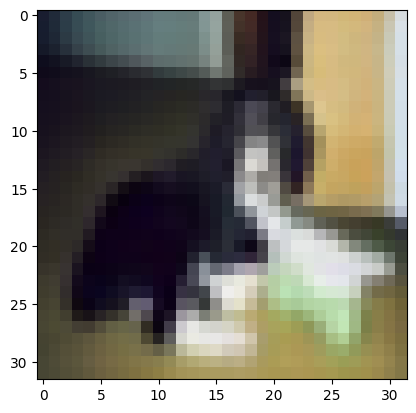

In [46]:
R = temp[0:1024].reshape(32,32)
G = np.reshape(temp[1024:2048],newshape=(32,32))
B = np.reshape(temp[2048:],newshape=(32,32))
temp = np.dstack((R,G,B))   #for stacking all these 32,32 matrices.
plt.imshow(temp)
plt.show()

In [49]:
svm.predict(dataset['test_data'][128])

array([1., 1., 1., ..., 1., 1., 1.])